In [0]:
%tensorflow_version 2.x

import tensorflow as tf

print(tf.__version__)
print(tf.test.gpu_device_name())

TensorFlow 2.x selected.
2.1.0
/device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np

#1 64x64 이미지 5000장씩 저장한 numpy 데이터를 불러와서 shape 확인
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)


In [0]:
#2 정규화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#3 모델 생성
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 16, 16, 256)     

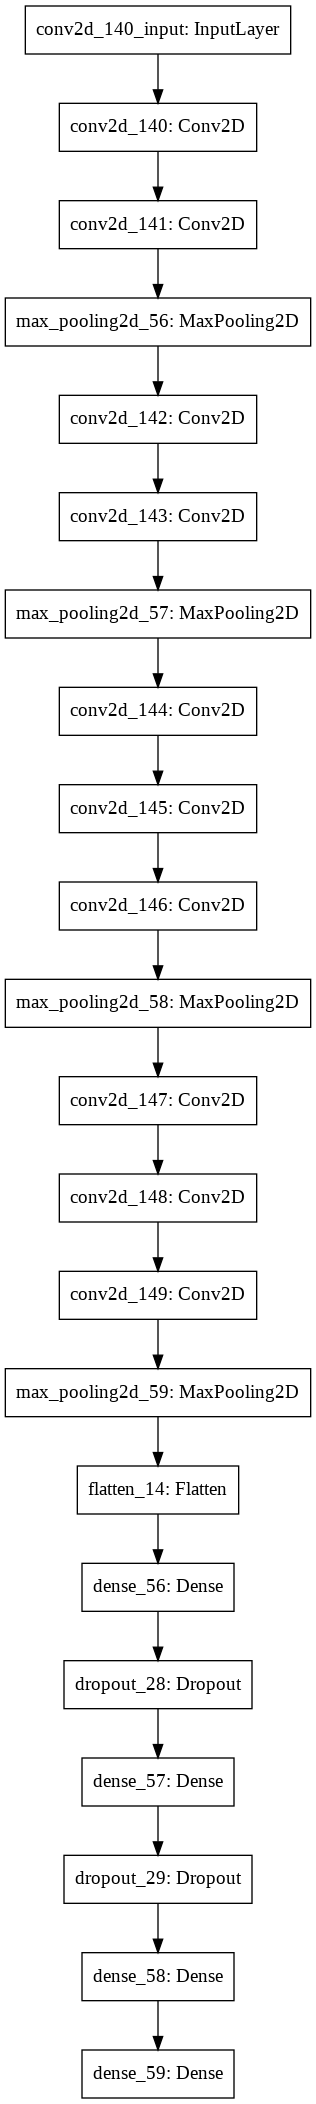

In [0]:
from tensorflow.keras.utils import plot_model

#4 모델 확인
model.summary()
plot_model(model)

In [0]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy']) # vgg16에선 'adam'보다 'sgd'가 적합

#5 모델 학습
model_path = "./drive/My Drive/final_data/practice11_sgd.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd = model.fit(X_train, y_train, batch_size=200, epochs=100, callbacks=[checkpoint], validation_split=0.2)

Train on 16641 samples, validate on 4161 samples
Epoch 1/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.6092 - accuracy: 0.2057
Epoch 00001: val_loss improved from inf to 1.60899, saving model to ./drive/My Drive/final_data/practice11_sgd.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd.model/assets
16641/16641 [==============================] - 16s 964us/sample - loss: 1.6092 - accuracy: 0.2059 - val_loss: 1.6090 - val_accuracy: 0.2043
Epoch 2/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.6089 - accuracy: 0.2086
Epoch 00002: val_loss improved from 1.60899 to 1.60865, saving model to ./drive/My Drive/final_data/practice11_sgd.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd.model/assets
16641/16641 [==============================] - 15s 890us/sample - loss: 1.6089 - accuracy: 0.2083 - val_loss: 1.6087 - val_accuracy: 0.2043
Epoch 3/100
16600/16641 [========================

In [0]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice11_sgd.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 409us/sample - loss: 0.4433 - accuracy: 0.8350
Test loss: 0.4433406616398702, accuracy: 0.8350317478179932
Confusion Matrix
[[ 930   30    7   34    7]
 [  55  749  163   80    8]
 [ 159  160  684   26    5]
 [  16   13    3 1100   19]
 [  27    0    1   45  880]]
Classification Report
              precision    recall  f1-score   support

          df       0.78      0.92      0.85      1008
         mel       0.79      0.71      0.75      1055
          nv       0.80      0.66      0.72      1034
         tsu       0.86      0.96      0.90      1151
          vl       0.96      0.92      0.94       953

    accuracy                           0.84      5201
   macro avg       0.84      0.83      0.83      5201
weighted avg       0.83      0.84      0.83      5201



In [0]:
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

#6 모델 학습2
model_path = "./drive/My Drive/final_data/practice11_sgd_momentum.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd_momentum = model.fit(X_train, y_train, batch_size=200, epochs=100, callbacks=[checkpoint], validation_split=0.2)

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Train on 16641 samples, validate on 4161 samples
Epoch 1/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.6088 - accuracy: 0.2059
Epoch 00001: val_loss improved from inf to 1.60610, saving model to ./drive/My Drive/final_data/practice11_sgd_momentum.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd_momentum.model/assets
16641/16641 [==============================] - 17s 1ms/sample - loss: 1.6088 - accuracy: 0.2060 - val_loss: 1.6061 - val_accuracy: 0.2045
Epoch 2/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.5936 - accuracy: 0.2572
Epoch 00002: val_loss improved from 1.60610 to 1.56351, saving model to ./drive/My Drive/final_data/practice11_sgd_momentum.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd_momentum.model/assets
16641/16641 [==============================] - 16s 985us/samp

In [0]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice11_sgd_momentum.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 404us/sample - loss: 0.4066 - accuracy: 0.8481
Test loss: 0.40661950346667636, accuracy: 0.8481061458587646
Confusion Matrix
[[ 935   36   18    8   11]
 [  36  884  123    8    4]
 [  93  282  648    5    6]
 [  33   65    9 1017   27]
 [  11    3    1   11  927]]
Classification Report
              precision    recall  f1-score   support

          df       0.84      0.93      0.88      1008
         mel       0.70      0.84      0.76      1055
          nv       0.81      0.63      0.71      1034
         tsu       0.97      0.88      0.92      1151
          vl       0.95      0.97      0.96       953

    accuracy                           0.85      5201
   macro avg       0.85      0.85      0.85      5201
weighted avg       0.85      0.85      0.85      5201



In [0]:
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, nesterov=True), metrics=['accuracy'])

#7 모델 학습3
model_path = "./drive/My Drive/final_data/practice11_sgd_nesterov.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd_nesterov = model.fit(X_train, y_train, batch_size=200, epochs=100, callbacks=[checkpoint], validation_split=0.2)

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Train on 16641 samples, validate on 4161 samples
Epoch 1/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.6093 - accuracy: 0.2017
Epoch 00001: val_loss improved from inf to 1.60891, saving model to ./drive/My Drive/final_data/practice11_sgd_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd_nesterov.model/assets
16641/16641 [==============================] - 15s 927us/sample - loss: 1.6093 - accuracy: 0.2019 - val_loss: 1.6089 - val_accuracy: 0.2043
Epoch 2/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.6088 - accuracy: 0.2087
Epoch 00002: val_loss improved from 1.60891 to 1.60837, saving model to ./drive/My Drive/final_data/practice11_sgd_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd_nesterov.model/assets
16641/16641 [==============================] - 15s 882us/sa

In [0]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice11_sgd_nesterov.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 441us/sample - loss: 0.4020 - accuracy: 0.8414
Test loss: 0.40195367704031904, accuracy: 0.8413766622543335
Confusion Matrix
[[ 881   60   40   11   16]
 [  28  818  172   30    7]
 [  94  198  723   13    6]
 [  19   31    6 1064   31]
 [  26    4    5   28  890]]
Classification Report
              precision    recall  f1-score   support

          df       0.84      0.87      0.86      1008
         mel       0.74      0.78      0.76      1055
          nv       0.76      0.70      0.73      1034
         tsu       0.93      0.92      0.93      1151
          vl       0.94      0.93      0.94       953

    accuracy                           0.84      5201
   macro avg       0.84      0.84      0.84      5201
weighted avg       0.84      0.84      0.84      5201



In [0]:
X_train, X_test, y_train, y_test = np.load("./drive/My Drive/final_data/practice7_data.npy", allow_pickle=True)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), metrics=['accuracy'])

#8 모델 학습4
model_path = "./drive/My Drive/final_data/practice11_sgd_momentum_nesterov.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_sgd_momentum_nesterov = model.fit(X_train, y_train, batch_size=200, epochs=100, callbacks=[checkpoint], validation_split=0.2)

X_train: (20802, 64, 64, 3), y_train: (20802, 5)
X_test: (5201, 64, 64, 3), y_test: (5201, 5)
Train on 16641 samples, validate on 4161 samples
Epoch 1/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.6084 - accuracy: 0.2074
Epoch 00001: val_loss improved from inf to 1.60489, saving model to ./drive/My Drive/final_data/practice11_sgd_momentum_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd_momentum_nesterov.model/assets
16641/16641 [==============================] - 17s 1ms/sample - loss: 1.6084 - accuracy: 0.2074 - val_loss: 1.6049 - val_accuracy: 0.2050
Epoch 2/100
16600/16641 [============================>.] - ETA: 0s - loss: 1.5860 - accuracy: 0.2659
Epoch 00002: val_loss improved from 1.60489 to 1.53487, saving model to ./drive/My Drive/final_data/practice11_sgd_momentum_nesterov.model
INFO:tensorflow:Assets written to: ./drive/My Drive/final_data/practice11_sgd_momentum_nesterov.model/assets
16641/16641 [============

In [0]:
# best 모델 불러와서 예측 후 평가
best_model = load_model("./drive/My Drive/final_data/practice11_sgd_momentum_nesterov.model")

eval = best_model.evaluate(X_test, y_test)
print(f'Test loss: {eval[0]}, accuracy: {eval[1]}')

predictions = best_model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)
print(f'Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print(f'Classification Report')
print(classification_report(y_test, y_pred, target_names=['df', 'mel', 'nv', 'tsu', 'vl']))

5201/5201 [==============================] - 2s 434us/sample - loss: 0.4584 - accuracy: 0.8383
Test loss: 0.4584385309224403, accuracy: 0.838300347328186
Confusion Matrix
[[ 911   35   47   10    5]
 [  39  766  225   16    9]
 [  81  188  751    9    5]
 [  36   47   11 1023   34]
 [  22    0    5   17  909]]
Classification Report
              precision    recall  f1-score   support

          df       0.84      0.90      0.87      1008
         mel       0.74      0.73      0.73      1055
          nv       0.72      0.73      0.72      1034
         tsu       0.95      0.89      0.92      1151
          vl       0.94      0.95      0.95       953

    accuracy                           0.84      5201
   macro avg       0.84      0.84      0.84      5201
weighted avg       0.84      0.84      0.84      5201



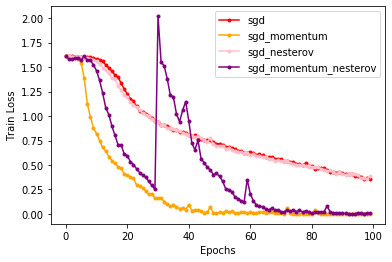

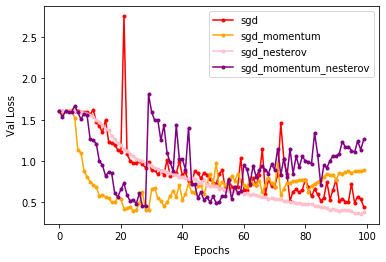

In [0]:
import matplotlib.pyplot as plt

#9 epoch-loss 그래프
# train data의 loss 그래프
train_loss_sgd = history_sgd.history['loss']
train_loss_sgd_momentum = history_sgd_momentum.history['loss']
train_loss_sgd_nesterov = history_sgd_nesterov.history['loss']
train_loss_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['loss']
x_len = range(100)
plt.plot(x_len, train_loss_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, train_loss_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, train_loss_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, train_loss_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()
# validation data의 loss 그래프
val_loss_sgd = history_sgd.history['val_loss']
val_loss_sgd_momentum = history_sgd_momentum.history['val_loss']
val_loss_sgd_nesterov = history_sgd_nesterov.history['loss']
val_loss_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['val_loss']
plt.plot(x_len, val_loss_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, val_loss_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, val_loss_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, val_loss_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.show()

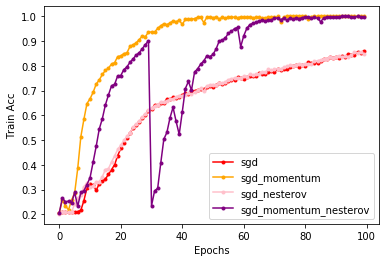

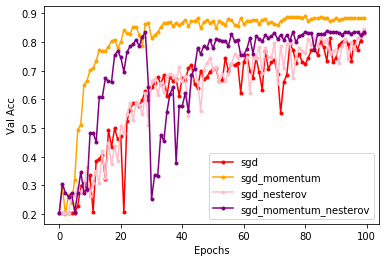

In [0]:
#10 epoch-accuracy 그래프
# train data의 accuracy 그래프
train_acc_sgd = history_sgd.history['accuracy']
train_acc_sgd_momentum = history_sgd_momentum.history['accuracy']
train_acc_sgd_nesterov = history_sgd_nesterov.history['accuracy']
train_acc_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['accuracy']
x_len = range(100)
plt.plot(x_len, train_acc_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, train_acc_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, train_acc_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, train_acc_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train Acc')
plt.show()
# validation data의 accuracy 그래프
val_acc_sgd = history_sgd.history['val_accuracy']
val_acc_sgd_momentum = history_sgd_momentum.history['val_accuracy']
val_acc_sgd_nesterov = history_sgd_nesterov.history['val_accuracy']
val_acc_sgd_momentum_nesterov = history_sgd_momentum_nesterov.history['val_accuracy']
plt.plot(x_len, val_acc_sgd, marker='.', color='red', label='sgd')
plt.plot(x_len, val_acc_sgd_momentum, marker='.', color='orange', label='sgd_momentum')
plt.plot(x_len, val_acc_sgd_nesterov, marker='.', color='pink', label='sgd_nesterov')
plt.plot(x_len, val_acc_sgd_momentum_nesterov, marker='.', color='purple', label='sgd_momentum_nesterov')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Val Acc')
plt.show()